In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [133]:
plr = pd.read_csv('data/Players.csv', index_col = 0)
plr

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [4]:

plr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.1+ KB


Бачимо, що у деяких колонках відсутня велика к-ть даних. Було прийнято рішення не видаляти їх, якщо у них є числові значення (висота, вага та рік народження)

In [5]:
# знаходимо дані із відсутніми значеннями для ваги
plr[plr['weight'].isnull()]

,Player,height,weight,collage,born,birth_city,birth_state
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# видаляємо рядки із повністю відсутніми значеннями
plr.dropna(axis=0, how='all', inplace=True)
plr[plr['weight'].isnull()]

,Player,height,weight,collage,born,birth_city,birth_state


In [101]:
plr['birth_state'].value_counts().head(10)

California      344
New York        290
Illinois        209
Pennsylvania    163
Ohio            137
Michigan        131
Texas           129
Georgia         118
Louisiana       101
Florida          96
Name: birth_state, dtype: int64

University of Kentucky                   89
University of California, Los Angeles    86
University of North Carolina             67
Name: collage, dtype: int64

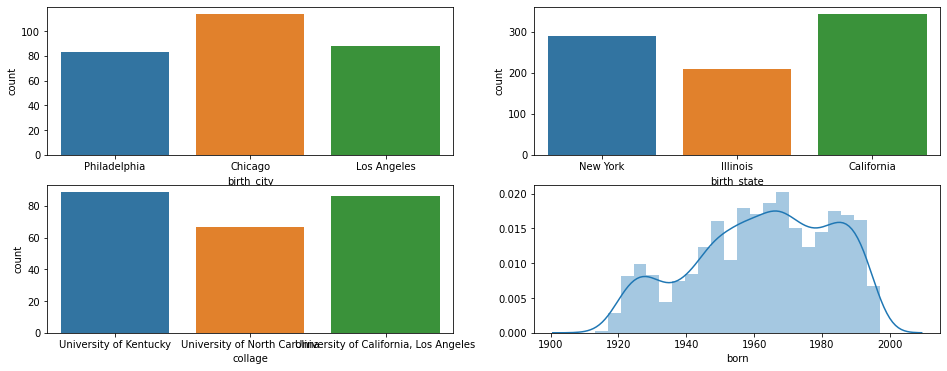

In [110]:
#побудуємо гістограму трьох коледжів по кількості гравців та динаміку народжуваності футболістів
_, axes = plt.subplots(2, 2, figsize=(16,6))
sns.countplot(plr[plr['birth_city'].isin(plr['birth_city'].value_counts().head(3).index)]['birth_city'], ax=axes[0, 0])
sns.countplot(plr[plr['birth_state'].isin(plr['birth_state'].value_counts().head(3).index)]['birth_state'], ax=axes[0, 1])
sns.countplot(plr[plr['collage'].isin(plr['collage'].value_counts().head(3).index)]['collage'], ax=axes[1, 0])
sns.distplot(plr['born'], ax=axes[1, 1])
plr['collage'].value_counts().head(3)

Отже, ми бачимо, що найбільша к-ть гравців походженням із Чикаго.
У штаті Каліфорнія народилося найбільше гравців.
Коледж із найбільшою кількістю футболістів - це University of Kentucky.
За динамікою народжуваності видно, що найбільша народжуваність була у 60 та 90 рр.

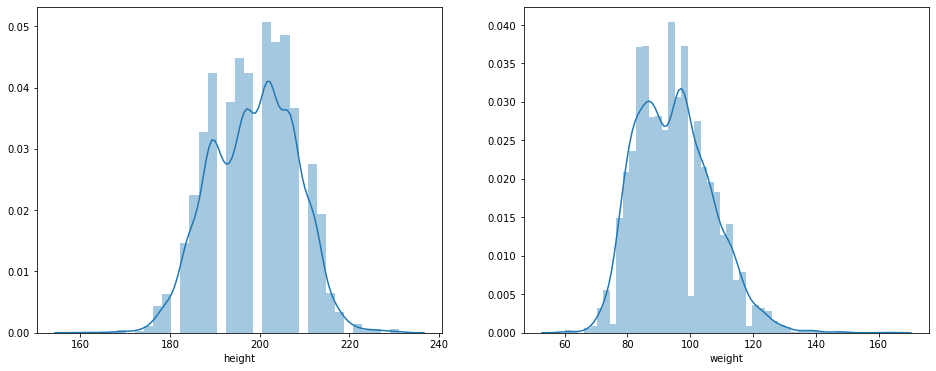

In [86]:
# побудуємо графіки по висоті та вазі гравців
_, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(plr['height'], ax=axes[0])
sns.distplot(plr['weight'], ax=axes[1])

Видно, що висота гравців знаходиться біля 2 метрів. Вага більшості гравців знаходиться між 80 та 100 кг.

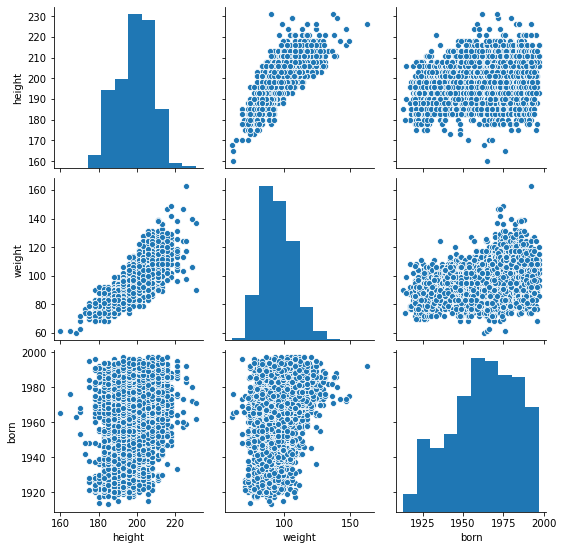

In [115]:
sns.pairplot(plr)

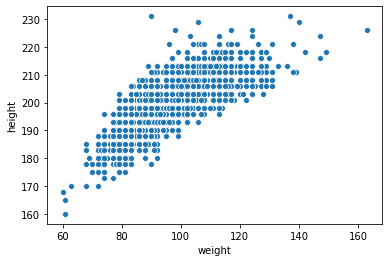

In [97]:
# побудуємо точкову діаграму для висоти та ваги
sns.scatterplot(plr['weight'], plr['height'])

Тут спостерігається очевидна взаємозалежність ваги та росту

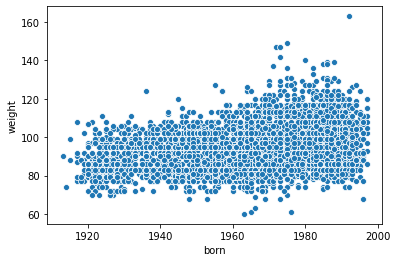

In [129]:
# побудуємо точкову діаграму для висоти та ваги
sns.scatterplot(plr['born'], plr['weight'], data=plr)

можна помітити, що максимальна вага гравців до 2000 р. зростає.